In [12]:
#考虑使用sklearn中的模板库来实现同样的多元下行回归
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  #绘制3D图像所需要的模块

In [13]:
data = np.genfromtxt("Delivery.csv", delimiter=",")
print(data)  #前两列为变量，最后一列为y值，即标签值

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


样本属性及标签的含义
x1:Miles(英里：尺寸)
x2:Num of Deliveries(交付量)
y :Time(交付时间)

In [14]:
#切分数据
x_data = data[:, :-1]
y_data = data[:, -1]
print(x_data)
print(y_data)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [15]:
#引入sklearn中的线性模型
model = linear_model.LinearRegression()
model.fit(x_data,y_data)

LinearRegression()

In [16]:
#查看该线性模型里的参数
print("系数：", model.coef_)
print("截距：", model.intercept_)

#测试新样本
x_test = [[108,5]]
predict = model.predict(x_test)
print("predict:", predict)

系数： [0.0611346  0.92342537]
截距： -0.868701466781709
predict: [10.35096204]


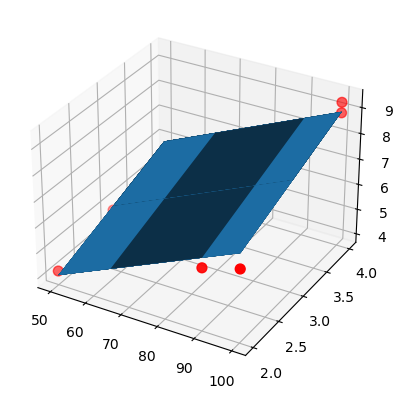

In [17]:
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(x_data[:, 0], x_data[:, 1], y_data,c = 'r', s = 50)
x0 = x_data[:, 0]
x1 = x_data[:, 1]

x0, x1 = np.meshgrid(x0, x1)  #网格矩阵
z = model.coef_[0] * x0 + model.coef_[1] * x1 + model.intercept_
#三维坐标系
ax.plot_surface(x0, x1, z)

plt.show()

根据结果，发现其实sklearn里拟合的平面和自己使用梯度下降的结果不太一样，这是因为在sklearn里使用的不是梯度下降法，而是标准方程法